In [ ]:
import pandas_profiling
import matplotlib.pyplot as plt                                     
import seaborn as sns
import pandas as pd 
import numpy as np
%matplotlib inline
sns.set()

#### Load department_data table

In [ ]:
depart_data_df = pd.read_csv('department_data.csv')
del depart_data_df['Unnamed: 0']
depart_data_df.head()

In [3]:
depart_data_df['dept_id'].unique()

array(['D00-IT', 'D00-SS', 'D00-TP', 'D00-ENG', 'D00-SP', 'D00-FN',
       'D00-PR', 'D00-AD', 'D00-MN', 'D00-MT', 'D00-PD'], dtype=object)

In [4]:
depart_data_df.shape

(11, 3)

#### Load employee_details_data table

In [5]:
emply_details_data = pd.read_csv('employee_details_data.csv')
del emply_details_data['Unnamed: 0']
emply_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
emply_details_data.shape

#### Load empolyee_data table

In [6]:
emply_data = pd.read_csv('employee_data.csv')
del emply_data['Unnamed: 0']
emply_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [ ]:
emply_data.shape

In [ ]:
sum(pd.isnull(emply_data['status']) == True)

In [7]:
df_merge = pd.merge(emply_details_data, emply_data, how='right',on="employee_id")
df_merge.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43.0,Male,Married,111.0,D00-PR,NaN,0.753977,5,1.0,medium,0.921208,Employed,4.0
1,112256,24.0,Female,Unmarried,201.0,D00-MN,NaN,0.964453,3,NaN,medium,0.568479,Employed,3.0
2,112586,22.0,Female,Unmarried,239.0,D00-SS,NaN,0.756458,3,NaN,low,0.144812,Employed,6.0
3,108071,36.0,Male,Married,151.0,D00-PR,NaN,0.608282,5,NaN,medium,0.210300,Employed,6.0
4,116915,38.0,Male,Married,259.0,-IT,NaN,0.749206,4,NaN,medium,0.888514,Employed,3.0


In [ ]:
sum(pd.isnull(df_merge['status']))

In [ ]:
df_merge['department'].unique()

In [8]:
#Assuming "-IT" and 'D00-IT' are same, merging them into "D00-IT"
df_merge['department'] = df_merge['department'].replace("-IT","D00-IT")

In [9]:
final_df = pd.merge(df_merge,depart_data_df,how='left',left_on='department',right_on='dept_id')
final_df.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43.0,Male,Married,111.0,D00-PR,NaN,0.753977,5,1.0,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,112256,24.0,Female,Unmarried,201.0,D00-MN,NaN,0.964453,3,NaN,medium,0.568479,Employed,3.0,D00-MN,Management,Ellie Trafton
2,112586,22.0,Female,Unmarried,239.0,D00-SS,NaN,0.756458,3,NaN,low,0.144812,Employed,6.0,D00-SS,Sales,Edward J Bayley
3,108071,36.0,Male,Married,151.0,D00-PR,NaN,0.608282,5,NaN,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles
4,116915,38.0,Male,Married,259.0,D00-IT,NaN,0.749206,4,NaN,medium,0.888514,Employed,3.0,D00-IT,IT,Henry Adey


In [10]:
#As department and dept_id are same deleting the dept_is
del final_df['dept_id']
del final_df['dept_name']
del final_df['dept_head']


In [11]:
del final_df['age']
del final_df['gender']
del final_df['marital_status']

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 11 columns):
employee_id          14150 non-null int64
avg_monthly_hrs      14150 non-null float64
department           13443 non-null object
filed_complaint      2046 non-null float64
last_evaluation      12663 non-null float64
n_projects           14150 non-null int64
recently_promoted    297 non-null float64
salary               14150 non-null object
satisfaction         14000 non-null float64
status               14150 non-null object
tenure               14000 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


### Analyzing all the features of the data set and replace them with approriate values

#### . employee_id - has no missing values
#### . avg_monthly_hrs - has no missing values
#### . n_projects - has no missing values
#### . salary - has no missing values
#### . status - has no missing values, this is the target value

In [13]:
#Convert the "avg_monthly_hrs" column to int
final_df['avg_monthly_hrs']=final_df.avg_monthly_hrs.astype(int)

In [14]:
#Replace salary fields - low=1, medium=2, high=3 
final_df['salary'] = final_df['salary'].replace("low",1)
final_df['salary'] = final_df['salary'].replace("medium",2)
final_df['salary'] = final_df['salary'].replace("high",3)
final_df['salary'].unique()

array([2, 1, 3], dtype=int64)

In [15]:
#Replace Status - Employed=0 and Left=1
final_df['status'] = final_df['status'].replace("Employed",0)
final_df['status'] = final_df['status'].replace("Left",1)
final_df['status'].unique()

array([0, 1], dtype=int64)

#### "department" - has more than 700 empty values replace them with mode
* Replace the Null values with the mode

In [16]:
final_df['department'].unique()

array(['D00-PR', 'D00-MN', 'D00-SS', 'D00-IT', 'D00-SP', 'D00-ENG',
       'D00-PD', 'D00-MT', 'D00-TP', nan, 'D00-AD', 'D00-FN'],
      dtype=object)

In [17]:
mode_department = final_df.department.mode()
#print(mode_department[0])
final_df.department.fillna(mode_department[0], inplace = True)

In [18]:
department_values=final_df['department'].unique()
for index,value in np.ndenumerate(department_values):
    #print(index[0],value)
    final_df['department'] = final_df['department'].replace(value,index[0])

In [19]:
final_df['department'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

#### filed_complaint and recently_promoted has most of NULL values
* Inorder to cross check how this values will effect the target variable, lets replace all NaN with 0

In [ ]:
#final_df['filed_complaint'].unique()

In [ ]:
#final_df.filed_complaint.fillna(0, inplace = True)
#final_df.recently_promoted.fillna(0, inplace = True)

In [ ]:
#final_df['filed_complaint'] = final_df.filed_complaint.astype(int)
#final_df['recently_promoted'] = final_df.recently_promoted.astype(int)

In [ ]:
#final_df['filed_complaint'].unique()
#final_df['recently_promoted'].unique()
#recently_promoted 

#### last_evaluation has 1487 Nan Values, replacing them with mean 

In [ ]:
#sum(pd.isnull(final_df['last_evaluation']))

In [ ]:
#final_df['last_evaluation'].unique()

In [ ]:
#mean_last_evaluation = final_df.last_evaluation.mean()
#print(mean_last_evaluation)
#final_df.last_evaluation.fillna(mean_last_evaluation, inplace = True)

In [ ]:
#sum(pd.isnull(final_df['last_evaluation']))

#### satisfaction and tenure has 500 missing values
* Replace the missing value with mean

In [20]:
final_df.tenure.fillna(final_df.tenure.mean(), inplace = True)
final_df['tenure'] = final_df.tenure.astype(int)

In [21]:
final_df.satisfaction.fillna(final_df.satisfaction.mean(), inplace = True)

In [22]:
final_df['satisfaction'].unique()

array([0.921208, 0.568479, 0.144812, ..., 0.437359, 0.68214 , 0.631046])

In [23]:
final_df['tenure'].unique()

array([ 4,  3,  6,  2,  5, 10,  7,  8], dtype=int64)

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 11 columns):
employee_id          14150 non-null int64
avg_monthly_hrs      14150 non-null int32
department           14150 non-null int64
filed_complaint      2046 non-null float64
last_evaluation      12663 non-null float64
n_projects           14150 non-null int64
recently_promoted    297 non-null float64
salary               14150 non-null int64
satisfaction         14150 non-null float64
status               14150 non-null int64
tenure               14150 non-null int32
dtypes: float64(4), int32(2), int64(5)
memory usage: 1.2 MB


In [28]:
final_df.to_csv('final_data_set_09082019_1.csv')

In [26]:
final_df[final_df.columns[1:]].corr()['status'][:]

avg_monthly_hrs      0.074082
department           0.015586
filed_complaint           NaN
last_evaluation      0.040814
n_projects           0.027647
recently_promoted         NaN
salary              -0.156124
satisfaction        -0.386584
status               1.000000
tenure               0.142071
Name: status, dtype: float64

Text(0.5,1,'Correlation between features')

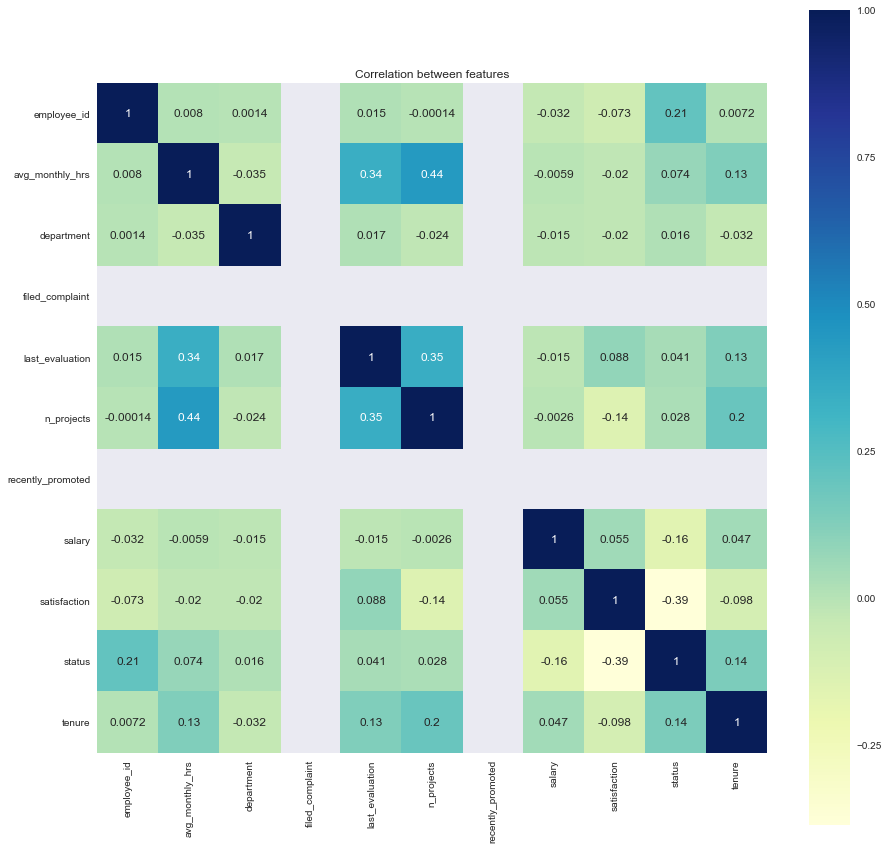

In [27]:
corr = final_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, square = True, cmap='YlGnBu',linecolor ='black')
#sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')